<a href="https://colab.research.google.com/github/Sasso28/Baby-Steps/blob/main/Countries_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[3 6 0 3 4 4 4 6 3 6 1 0 2 0 3 2 4 6 0 4 5 5 6 4 6 3 3 4 3 4 3 3 3 3 3 2 6
 0 5 4 3 6 5 5 0 5 1 3 0 5 3 3 3 3 4 4 4 4 0 3 4 3 5 3 4 0 4 4 0 4 2 3 4 4
 2 5 4 6 4 5 5 5 5 5 4 3 4 3 2 3 2 0 3 4 3 4 2 4 6 2 0 4 6 6 4 4 4 3 4 4 2
 6 6 0 6 2 3 3 2 4 6 2 4 5 4 3 4 6 0 4 4 4 2 3 5 4 4 0 6 3 2 4 5 4 6 4 6 2
 0 5 3 0 0 2 0 2 5 2 5 3 1 4 4 6 2 2 6 6 3 1 3 2 2 2 4 3 2 4 3 4 1 6 4 6 0
 5 6 0 0 5 2 3 5 2 5 3 4 0 0 3 4 5 3 4 4 4 0 3 0 4 3 5 5 2 6 6 2 1 3 4 4 2
 0 0 4 3 3 6 4 3 3 3 3 2 2 1 1 6 0 0 0]


(-90.0, 90.0)

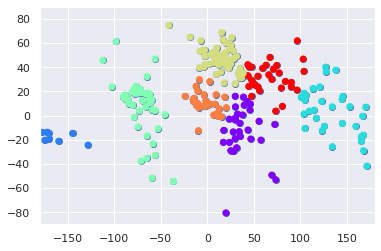

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

path = r'/content/drive/MyDrive/Countries_exercise.csv'
data_raw = pd.read_csv(path)

plt.scatter(data_raw['Longitude'], data_raw['Latitude'])


##Selecting the features o
x = data_raw.iloc[:,1:3]


#♪Clustering, with 3 clusters
kmeans = KMeans(7)
kmeans.fit(x)

#Clustering results
identified_clusters = kmeans.fit_predict(x)
print(identified_clusters)
data_with_clusters = data_raw.copy()
#Adding a column to the data in order to have insert it 
data_with_clusters['Clusters'] = identified_clusters

plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap ='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)


In [10]:
data_raw.columns

Index(['name', 'Longitude', 'Latitude'], dtype='object')

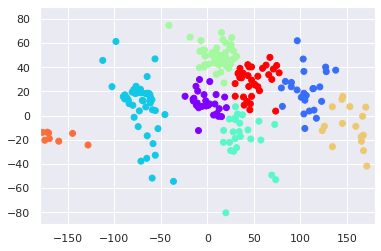

In [16]:
#Clustering based on categorical data, language in this case
path = r'/content/drive/MyDrive/Countries_exercise.csv'
data_copy = pd.read_csv(path)
data_copy.dropna(axis=0)

kmeans = KMeans(8)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_language = data_copy.copy()
data_language['Clusters'] = identified_clusters
plt.scatter(data_language['Longitude'], data_language['Latitude'], c=data_language['Clusters'], cmap ='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

#Idea behind WCSS
#1) minimizing the distance points in a cluster
#2) maximizing the distance between clusters
#3) distance between points in a cluster
#4) Within-Cluster Sum of Squares
wcss = []
for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(x)   #for the categorical example
    #kmeans.fit(x)  #for the first part of the example
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
number_of_clusters = range(1,9)
    
plt.plot(number_of_clusters, wcss)
plt.show()

# PROS  of Kmeans Clustering      CONS
#1)Simple to understand           1) Need to pick a K --> Elbow method to calculate WCSS
#2)Fast to cluster                2) Sensitive to initialization (first centroids and seeds are problematic, Kmeans analyses is problematic)  --> k-means++ to have an algorithm calculating the first seeds and centroids for the further analysis
#3)Widely available               3) Sensitive to outliers --> remove outliers
#4)Easy to implement              4) Produces spherical solutions, on an Euclidean plan it turns in elliptic clustering
#5) Yields always a results       5) Standirdization; superuseful, but it doesn't have to be used if one measure is much more important than the other ones


#) It's an optional argument inside KMeans, init = k-mean++

In [9]:
data_copy.columns

Index(['name', 'Longitude', 'Latitude'], dtype='object')